# Airlines Passenger Forecasting using Stacked LSTM

This is a problem where, given a year and a month, the task is to predict the number of international airline passengers in units of 1,000. The data ranges from January 1949 to December 1960, or 12 years, with 144 observations.

In [1]:
import pandas as pd

In [2]:
# kaggle dataset
# https://www.kaggle.com/rakannimer/air-passengers?select=AirPassengers.csv
df=pd.read_csv('AirPassengers.csv')

In [3]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
import matplotlib.pyplot as plt

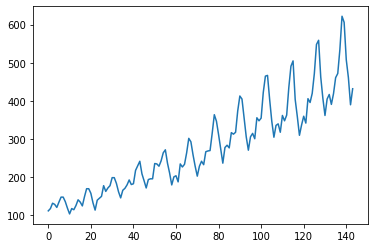

In [5]:
plt.plot(df.iloc[:,1])

### Scaling

LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) or tanh activation functions are used. It can be a good practice to rescale the data to the range of 0-to-1, also called normalizing. We can easily normalize the dataset using the MinMaxScaler preprocessing class from the scikit-learn library.

In [6]:
from sklearn.preprocessing import MinMaxScaler 

In [7]:
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(df.iloc[:,1:])

In [8]:
df.shape

(144, 1)

In [9]:
df

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [10]:
# Spliting dataset into train and test split
training_size=int(len(df)*0.65)

In [11]:
test_size=len(df)-training_size

In [12]:
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]

In [13]:
test_data

array([[0.38996139],
       [0.32239382],
       [0.38996139],
       [0.40733591],
       [0.38030888],
       [0.48648649],
       [0.47104247],
       [0.48455598],
       [0.61389961],
       [0.6969112 ],
       [0.7007722 ],
       [0.57915058],
       [0.46911197],
       [0.38803089],
       [0.44787645],
       [0.45559846],
       [0.41312741],
       [0.4980695 ],
       [0.47104247],
       [0.5       ],
       [0.63899614],
       [0.74710425],
       [0.77413127],
       [0.57915058],
       [0.49227799],
       [0.3976834 ],
       [0.44980695],
       [0.49420849],
       [0.45945946],
       [0.58301158],
       [0.56370656],
       [0.61003861],
       [0.71042471],
       [0.85714286],
       [0.87837838],
       [0.69305019],
       [0.58494208],
       [0.4980695 ],
       [0.58108108],
       [0.6042471 ],
       [0.55405405],
       [0.60810811],
       [0.68918919],
       [0.71042471],
       [0.83204633],
       [1.        ],
       [0.96911197],
       [0.779

In [14]:
import numpy as np
# Convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0] # i=0, 0,1,2,3
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [15]:
# Reshape into x=t, t+1, t+2, t+3 and Y=t+4
time_step=4
X_train, y_train=create_dataset(train_data, time_step)
X_test, y_test=create_dataset(test_data, time_step)

In [16]:
X_train.shape, y_train.shape

((88, 4), (88,))

In [17]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0], 4, 1)
X_test = X_test.reshape(X_test.shape[0], 4, 1)

In [18]:
# Create the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [19]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(4,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=1,verbose=1)

Epoch 1/100
88/88 [==============================] - 3s 34ms/step - loss: 0.0130 - val_loss: 0.0263
Epoch 2/100
88/88 [==============================] - 1s 10ms/step - loss: 0.0077 - val_loss: 0.0333
Epoch 3/100
88/88 [==============================] - 1s 10ms/step - loss: 0.0061 - val_loss: 0.0291
Epoch 4/100
88/88 [==============================] - 1s 9ms/step - loss: 0.0065 - val_loss: 0.0315
Epoch 5/100
88/88 [==============================] - 1s 9ms/step - loss: 0.0050 - val_loss: 0.0368
Epoch 6/100
88/88 [==============================] - 1s 10ms/step - loss: 0.0067 - val_loss: 0.0253
Epoch 7/100
88/88 [==============================] - 1s 10ms/step - loss: 0.0056 - val_loss: 0.0425
Epoch 8/100
88/88 [==============================] - 1s 10ms/step - loss: 0.0053 - val_loss: 0.0241
Epoch 9/100
88/88 [==============================] - 1s 10ms/step - loss: 0.0052 - val_loss: 0.0237
Epoch 10/100
88/88 [==============================] - 1s 10ms/step - loss: 0.0057 - val_loss: 0.0221
E

In [20]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [21]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [22]:
test_predict

array([[306.1597 ],
       [291.08823],
       [381.1472 ],
       [317.5278 ],
       [358.64673],
       [448.39713],
       [444.52298],
       [429.54523],
       [330.78598],
       [314.02774],
       [278.98843],
       [351.2962 ],
       [322.8276 ],
       [302.39343],
       [384.5168 ],
       [313.9956 ],
       [371.8066 ],
       [460.8816 ],
       [476.06384],
       [463.0271 ],
       [285.45703],
       [353.30374],
       [263.3146 ],
       [353.04694],
       [352.13287],
       [318.54037],
       [442.4864 ],
       [341.82947],
       [435.35593],
       [470.1116 ],
       [548.7061 ],
       [462.38843],
       [328.1827 ],
       [369.06088],
       [291.39545],
       [421.6158 ],
       [375.97296],
       [355.83606],
       [431.97345],
       [445.22922],
       [429.01004],
       [554.4599 ],
       [586.5026 ],
       [424.55524],
       [366.87433],
       [379.24652]], dtype=float32)

In [23]:
y_train.shape,train_predict.shape,train_predict

((88,),
 (88, 1),
 array([[131.98276],
        [126.0606 ],
        [138.42075],
        [149.69438],
        [150.02042],
        [140.35753],
        [126.1704 ],
        [112.86043],
        [122.53683],
        [119.23841],
        [128.58711],
        [142.46631],
        [137.76163],
        [130.28464],
        [151.82825],
        [170.55249],
        [170.39369],
        [160.894  ],
        [139.29395],
        [123.1426 ],
        [143.92763],
        [146.7108 ],
        [151.9942 ],
        [179.80162],
        [163.39362],
        [175.8054 ],
        [180.71027],
        [201.73546],
        [199.02084],
        [185.13838],
        [166.13713],
        [152.6141 ],
        [171.0859 ],
        [172.77776],
        [182.00826],
        [195.21967],
        [181.56859],
        [186.87703],
        [223.28546],
        [229.28185],
        [243.33731],
        [202.98862],
        [195.339  ],
        [176.52696],
        [200.28773],
        [196.87321],
        [197.752

In [24]:
# Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

221.52364520501484

In [25]:
# Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

392.16761657579264

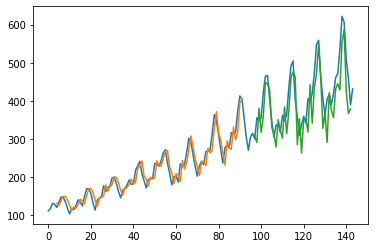

In [27]:
# shift train predictions for plotting
look_back=4
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))

plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()